# MACHINE LEARNING Project-2 Predicting players rating

In [43]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [54]:
# Create your connection.
cnx = sqlite3.connect("C:\\sqlite\db\soccer\database.sqlite")
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [62]:
#Print the shape to understand the dataframe size
print(df.shape)
#check for null values if any
print(df.isnull().values.sum())

(183978, 42)
47301


# Method 1 - Lets build model by removing all the null values

In [63]:
#dropp null values
df.dropna(inplace=True)

In [64]:
#Pick the independent variables from the Dataset
df_features=df[df.columns[5:]]

#check for the shape of the independent variables - 42 cols became 37 and nulls removed
df_features.shape

(180354, 37)

In [65]:
#check to see if nulls exist
df_features.isnull().values.sum()

0

In [66]:
#remove the three non numeric cols. Cols reduced from 37 to 34
df_features.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1,inplace=True)
df_features.shape

C:\Users\shrik\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(180354, 34)

In [67]:
#check for null values again
df_features.isnull().values.sum()

0

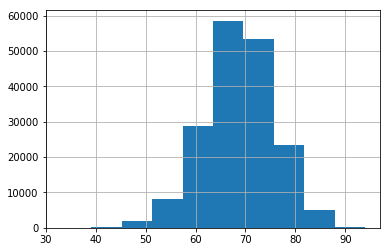

In [68]:
import matplotlib as mlt
%matplotlib inline
#create a list of dependent column, which is the player ranking
df_target=df[df.columns[4]]
df_target.hist()

In [69]:
df_target.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [70]:
df_target.describe()

count    180354.000000
mean         68.635317
std           7.027950
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [71]:
#check for null values in the dependent variable
df_target.isnull().values.sum()

0

In [72]:
#split the dataset into training and test
X_Train,X_Test,y_Train,y_Test = train_test_split(df_features,df_target,test_size=0.3)

In [73]:
#Build the LInear Regression model using the training dataset
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()
linReg.fit(X_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
#print the slope and the intercept
print(linReg.coef_)
print(linReg.intercept_)

[ 0.37769984  0.02219767  0.01147902  0.07024426  0.05246982  0.00421478
 -0.01254317  0.01117162  0.01335169  0.00583521  0.13586728  0.00495818
  0.0095204  -0.00751969  0.20894588  0.00844897  0.01704284  0.01632595
 -0.00479674  0.06127641 -0.01344693  0.01963855  0.0130237  -0.01080366
 -0.00366645  0.01410635  0.03262316  0.00359182 -0.02939575  0.16234815
  0.03442576 -0.03431268  0.05927395  0.02332251]
-3.68056234005


In [16]:
#predict the test data using the Test dataset
print(linReg.predict(X_Test))

[ 83.99227764  77.42570246  81.82453011 ...,  74.21660501  79.01074883
  75.35293158]


In [75]:
#Check for the accuracy score
linReg.score(X_Test,y_Test)

0.84137232362066761

# Build a DecisionTree model

In [76]:
from sklearn.tree import DecisionTreeRegressor
decTree=DecisionTreeRegressor()
decTree.fit(X_Train,y_Train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
#Predict the Test data
decTree.predict(X_Test)

array([ 81.,  79.,  81., ...,  77.,  82.,  73.])

In [77]:
#Check for the score
decTree.score(X_Test,y_Test)

0.96013917890264455

# Method 2 - Now Replacing NaNs with Mean Value & then building a model

In [21]:
#get the data from the csv file
dfM = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [78]:
#Pick the independent variables and remove unwanted columns
df_Mfeatures=dfM[dfM.columns[5:]]
df_Mfeatures.drop(['preferred_foot','attacking_work_rate','defensive_work_rate'],axis=1,inplace=True)
df_Mfeatures.shape

C:\Users\shrik\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(183978, 34)

In [79]:
#build the dependent variable
df_Mtarget=dfM[dfM.columns[4]]

In [80]:
#Replace the NaNs with the mean value of the respective columns & check for null values
df_Mfeatures.apply(lambda x:x.fillna(x.mean(),axis=0,inplace=True))
df_Mfeatures.isnull().values.sum()

0

In [81]:
#fill mean values inplace of NaNs for the Dependent variable
df_Mtarget.fillna(df_Mtarget.mean(),inplace=True)
df_Mtarget.isnull().values.sum()

0

In [34]:
#prepare Train and Test set
X_Train,X_Test,y_Train,y_Test = train_test_split(df_Mfeatures,df_Mtarget,test_size=0.3)

In [82]:
#Build the Linear Regression model 
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()
linReg.fit(X_Train,y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
#print the Slope and Intercept values
print(linReg.coef_)
print(linReg.intercept_)

[ 0.37769984  0.02219767  0.01147902  0.07024426  0.05246982  0.00421478
 -0.01254317  0.01117162  0.01335169  0.00583521  0.13586728  0.00495818
  0.0095204  -0.00751969  0.20894588  0.00844897  0.01704284  0.01632595
 -0.00479674  0.06127641 -0.01344693  0.01963855  0.0130237  -0.01080366
 -0.00366645  0.01410635  0.03262316  0.00359182 -0.02939575  0.16234815
  0.03442576 -0.03431268  0.05927395  0.02332251]
-3.68056234005


In [84]:
#Print the predicted values
print(linReg.predict(X_Test))

[ 76.48584061  80.13040325  67.05015067 ...,  71.4791441   59.50315087
  77.80602065]


In [85]:
#find the score
linReg.score(X_Test,y_Test)

0.84137232362066761

# Repeat the test for DecisionTree model

In [86]:
from sklearn.tree import DecisionTreeRegressor
decTree=DecisionTreeRegressor()
decTree.fit(X_Train,y_Train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [87]:
decTree.predict(X_Test)

array([ 76.,  81.,  67., ...,  70.,  63.,  80.])

In [88]:
decTree.score(X_Test,y_Test)

0.96011131474475897

In [ ]:
#we could see higher percentage of prediction for DecisionTree and the values predicted and near to equal in both tests.